 # Salary prediction:
        importing libraries:
        We will first go with importing the necessary libraries and import our dataset to jupyter notebook:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error

# Load the dataset/Data Exploration::
            Below is the code snippet of loading the dataset

In [132]:
train = pd.read_csv('Salaries.csv')
train

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [134]:
train['Sex']=train.sex.map({'Female':0,'Male':1})
train['Discipline']=train.discipline.map({'B':0,'A':1})

In [135]:
train.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary,Sex,Discipline
0,Prof,B,19,18,Male,139750,1,0
1,Prof,B,20,16,Male,173200,1,0
2,AsstProf,B,4,3,Male,79750,1,0
3,Prof,B,45,39,Male,115000,1,0
4,Prof,B,40,41,Male,141500,1,0


In [136]:
data=train.drop(['discipline'],axis='columns')

In [137]:
data

,rank,yrs.since.phd,yrs.service,sex,salary,Sex,Discipline
0,Prof,19,18,Male,139750,1,0
1,Prof,20,16,Male,173200,1,0
2,AsstProf,4,3,Male,79750,1,0
3,Prof,45,39,Male,115000,1,0
4,Prof,40,41,Male,141500,1,0
...,...,...,...,...,...,...,...
392,Prof,33,30,Male,103106,1,1
393,Prof,31,19,Male,150564,1,1
394,Prof,42,25,Male,101738,1,1
395,Prof,25,15,Male,95329,1,1


In [149]:
data1=train.drop(['sex'],axis='columns')

In [148]:
data1

,rank,discipline,yrs.since.phd,yrs.service,salary,Sex,Discipline
0,Prof,B,19,18,139750,1,0
1,Prof,B,20,16,173200,1,0
2,AsstProf,B,4,3,79750,1,0
3,Prof,B,45,39,115000,1,0
4,Prof,B,40,41,141500,1,0
...,...,...,...,...,...,...,...
392,Prof,A,33,30,103106,1,1
393,Prof,A,31,19,150564,1,1
394,Prof,A,42,25,101738,1,1
395,Prof,A,25,15,95329,1,1


In [153]:
data2=data1.drop(['discipline'],axis='columns')

In [154]:
data2

,rank,yrs.since.phd,yrs.service,salary,Sex,Discipline
0,Prof,19,18,139750,1,0
1,Prof,20,16,173200,1,0
2,AsstProf,4,3,79750,1,0
3,Prof,45,39,115000,1,0
4,Prof,40,41,141500,1,0
...,...,...,...,...,...,...
392,Prof,33,30,103106,1,1
393,Prof,31,19,150564,1,1
394,Prof,42,25,101738,1,1
395,Prof,25,15,95329,1,1


# Label encoding & Ordinal Encoding -process done in the given dataset:

In [155]:
from sklearn.preprocessing import OrdinalEncoder
data2["rank"].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [156]:
enc=OrdinalEncoder()

In [157]:
print(enc)

OrdinalEncoder()


In [158]:
enc.fit_transform(data2[["rank"]])

array([[2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],

In [159]:
data2[["rank"]]=enc.fit_transform(data2[["rank"]])

In [160]:
data2

,rank,yrs.since.phd,yrs.service,salary,Sex,Discipline
0,2.0,19,18,139750,1,0
1,2.0,20,16,173200,1,0
2,1.0,4,3,79750,1,0
3,2.0,45,39,115000,1,0
4,2.0,40,41,141500,1,0
...,...,...,...,...,...,...
392,2.0,33,30,103106,1,1
393,2.0,31,19,150564,1,1
394,2.0,42,25,101738,1,1
395,2.0,25,15,95329,1,1


In [161]:
data2.isnull().sum()

rank             0
yrs.since.phd    0
yrs.service      0
salary           0
Sex              0
Discipline       0
dtype: int64

In [162]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   yrs.since.phd  397 non-null    int64  
 2   yrs.service    397 non-null    int64  
 3   salary         397 non-null    int64  
 4   Sex            397 non-null    int64  
 5   Discipline     397 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 18.7 KB


In [163]:
data2.describe()

,rank,yrs.since.phd,yrs.service,salary,Sex,Discipline
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,22.314861,17.614610,113706.458438,0.901763,0.455919
std,0.757486,12.887003,13.006024,30289.038695,0.298010,0.498682
min,0.000000,1.000000,0.000000,57800.000000,0.000000,0.000000
25%,1.000000,12.000000,7.000000,91000.000000,1.000000,0.000000
50%,2.000000,21.000000,16.000000,107300.000000,1.000000,0.000000
75%,2.000000,32.000000,27.000000,134185.000000,1.000000,1.000000
max,2.000000,56.000000,60.000000,231545.000000,1.000000,1.000000


Plotting Scatter plot to check relationship between independent variable and dependent variable:

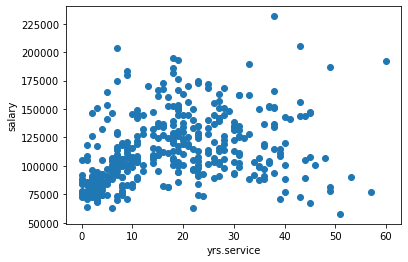

In [169]:
plt.scatter( data2['yrs.service'] ,data['salary'] )
plt.xlabel('yrs.service')
plt.ylabel('salary')
plt.show()

We can find the dimensions of the data set using the panda dataset ‘shape’ attribute.

In [193]:
x = data2.drop('salary',axis=1)
y = data2['salary']

In [194]:
x.shape,y.shape

((397, 5), (397,))

# Split dataset into training set and test set:
    We will use the training dataset for training the model and then check the performance of the model on the test dataset. For this we will use the train_test_split method from library model_selection.We are providing a test_size of 1/2 which means test set will contain 20% observations and training set will contain 80% observations

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((317, 5), (80, 5), (317,), (80,))

In [172]:
x_train

,rank,yrs.since.phd,yrs.service,Sex,Discipline
357,2.0,39,35,1,1
161,2.0,26,19,1,0
157,1.0,1,0,1,0
331,2.0,20,9,1,0
355,2.0,25,21,1,0
...,...,...,...,...,...
63,0.0,11,11,0,0
326,2.0,23,15,1,0
337,2.0,13,12,1,0
11,1.0,7,2,1,0


# Building the model::
          We will be using the LinearRegression class from the library sklearn.linear_model. First we create an object of the LinearRegression class and call the fit method passing the xtrain and ytrain.Linear Regression is a statistical supervised learning technique to predict the quantitative variable by forming a linear relationship with one or more independent features.It expresses the relation among the dependent and independent vector’s as a straight and is in the form as  below.

In [174]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [175]:
pred = lr.predict(x_test)
pred

array([141377.51525665, 129248.21575335, 135068.30987947, 124515.99743953,
        89254.17804762, 123900.44450617,  88543.38044848, 135776.79419788,
        88090.1592224 ,  94030.81639584, 121029.5370879 , 131120.71889698,
       131027.78751193,  84403.07849834, 108894.64146055, 118701.49943745,
        80776.95344653, 126222.88603257,  76351.44346106, 121976.14716856,
       127398.09710588, 135908.83200421, 140427.27337473, 127617.47017322,
       133004.4142887 ,  86695.57508175, 121732.42528227, 125767.35152576,
       131834.79933943, 110525.38704067, 114500.95864337, 132537.6875338 ,
       130429.0229507 , 128573.30817919,  78223.9466047 , 119843.1337665 ,
       111689.4058659 ,  88076.65369358, 133004.4142887 , 120574.00258108,
       114500.95864337,  79727.90154459,  95563.38342481, 127848.03548865,
       122730.8295569 , 146725.28650383, 111464.43667451, 115901.13890806,
       103537.99124602,  91511.66880918, 126706.4011596 ,  85512.45460367,
       133240.57572817, 1

In [176]:
y_test

38     125196
187    107500
221    145200
109    131205
91     105128
        ...  
181    141136
17     103450
89     107008
57      90215
255     83000
Name: salary, Length: 80, dtype: int64

In [177]:
diff = y_test - pred

In [178]:
pd.DataFrame(np.c_[y_test , pred , diff] , columns=['Actual','Predicted','Difference'])

,Actual,Predicted,Difference
0,125196.0,141377.515257,-16181.515257
1,107500.0,129248.215753,-21748.215753
2,145200.0,135068.309879,10131.690121
3,131205.0,124515.997440,6689.002560
4,105128.0,89254.178048,15873.821952
...,...,...,...
75,141136.0,132734.676105,8401.323895
76,103450.0,120096.083578,-16646.083578
77,107008.0,88090.159222,18917.840778
78,90215.0,87392.867152,2822.132848


C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

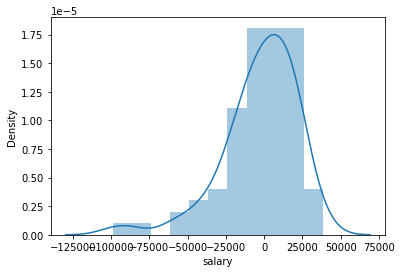

In [199]:
import seaborn as sns
sns.distplot(pred-y_test)

# Accuracy::
Predicting the accuracy using r2 score and finding the maximum accuracy

In [183]:
lr.score(x_test , y_test)

0.39087352802385145

In [184]:
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test,pred)

In [185]:
rmse , r2

(24900.075865488547, 0.39087352802385145)

In [195]:
print(lr.coef_)
print(lr.intercept_)

[ 16386.88165746   1164.01882522   -697.29207033   6251.27981398
 -15697.4989919 ]
76243.75447368553
